## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing datasets

In [2]:
# Import train and test
raw_train = pd.read_csv('../Data/train.csv')
raw_test = pd.read_csv('../Data/test.csv')

In [3]:
# Add column indicating type of sample
raw_train["Train"] = 1
raw_test["Train"] = 0
# Combine datasets
raw_combined = pd.concat([raw_train, raw_test])
# Shape of the resulting df
raw_combined.shape

/Users/luciaronchi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


(1309, 13)

In [4]:
# Check resulting dataframe
raw_combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Train
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


## Interpreting Variables (only for Train dataset)

In [5]:
# Possible predictors are all variables except the ones containing unique information such as Name and PassengerId
predictors = ["Age", "Cabin", "Embarked", "Fare", "Parch", "Pclass", "Sex", "SibSp", "Ticket"]
# Target variable is what we want to predict
target = ["Survived"]

## Variable descriptions

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  


**embarked**: Port of Embarkation
- C = Cherbourg
- Q = Queenstown
- S = Southampton  


**parch**: The dataset defines family relations in this way...  
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them


**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower


**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

## Survived

In [6]:
# Unique values
raw_train["Survived"].unique()

array([0, 1])

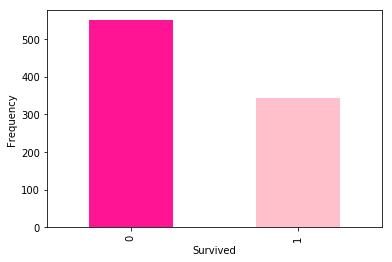

In [7]:
# Bar chart
plt.figure()
raw_train.groupby("Survived").count()["PassengerId"].plot(kind = "bar", color = ["#FF1493",'#FFC0CB'])
plt.ylabel("Frequency")
plt.show()

Observation: There are more deaths than survivals.

## Sex

In [8]:
# Unique values
raw_train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [9]:
# Missing values (%)
sum(pd.isna(raw_train["Sex"]))/len(raw_train)*100

0.0

In [10]:
# Create dataframe for plot
# Select variable for analysis
var = "Sex"
# Generate dataframe grouping by the variable of interest
df = raw_train.groupby([var], as_index = False).sum()
# Create the variable "Died" by substracting survivals from total passengers
df["Died"] = raw_train.groupby([var], as_index = False).sum()["Train"] - raw_train.groupby([var], as_index = False).sum()["Survived"]
# Extract only variables of interest
df = df.loc[:,[var, "Survived", "Died"]]
# Visualize resulting df
df

,Sex,Survived,Died
0,female,233,81
1,male,109,468


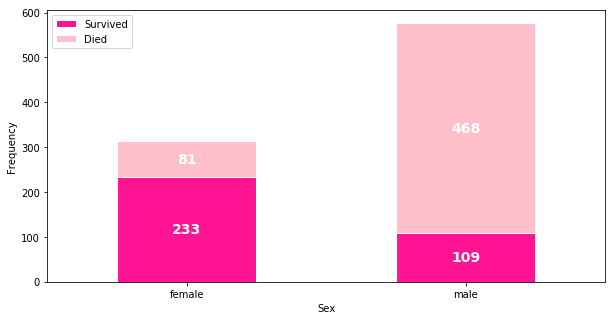

In [11]:
# Define colors
colors = ['#FF1493', '#FFC0CB']

# Plot a stacked bar chart
ax = df[["Survived", "Died"]].plot(stacked = True, kind = 'bar', figsize = (10, 5), color = colors, edgecolor='white',)

# Set no rotation in axis labels
plt.xticks(rotation=0)

# Set axis names and labels
plt.xlabel(var)
plt.xticks(np.arange(len(df)), df[var])
plt.ylabel("Frequency")

# Locate each rectangle in the plot's patches (objects)
for rect in ax.patches:
    
    # Find where each rectangle is located
    height = rect.get_height()
    width = rect.get_width()
    
    # Get coordinates
    x = rect.get_x()
    y = rect.get_y()
    
    # The frequency is represented by the height of each rectangle, and it's what we want to show
    label_text = height
    
    # Assign position of the label
    label_x = x + width/2
    label_y = y + height/2
    
    # Add text label
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 14, fontweight = "bold", color = "white")

# Show plot
plt.show()

Observation: There were more males than females, but female survival rate is much higher than male survival rate.

### Pclass

In [12]:
# Unique values
raw_train["Pclass"].unique()

array([3, 1, 2])

In [13]:
# Missing values (%)
sum(pd.isna(raw_train["Pclass"]))/len(raw_train)*100

0.0

In [14]:
# Create dataframe for plot
# Select variable for analysis
var = "Pclass"
# Generate dataframe grouping by the variable of interest
df = raw_train.groupby([var], as_index = False).sum()
# Create the variable "Died" by substracting survivals from total passengers
df["Died"] = raw_train.groupby([var], as_index = False).sum()["Train"] - raw_train.groupby([var], as_index = False).sum()["Survived"]
# Extract only variables of interest
df = df.loc[:,[var, "Survived", "Died"]]
# Visualize resulting df
df

,Pclass,Survived,Died
0,1,136,80
1,2,87,97
2,3,119,372


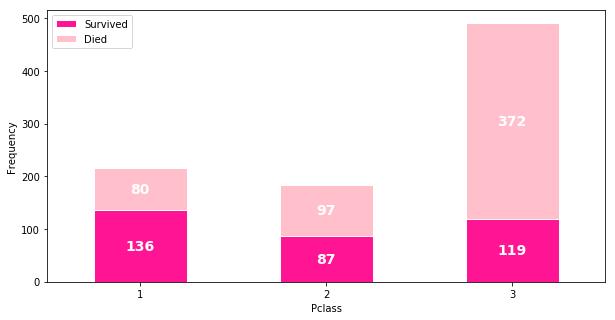

In [15]:
# Define colors
colors = ['#FF1493', '#FFC0CB']

# Plot a stacked bar chart
ax = df[["Survived", "Died"]].plot(stacked = True, kind = 'bar', figsize = (10, 5), color = colors, edgecolor = 'white',)

# Set no rotation in axis labels
plt.xticks(rotation=0)

# Set axis names and labels
plt.xlabel(var)
plt.xticks(np.arange(len(df)), df[var])
plt.ylabel("Frequency")

# Locate each rectangle in the plot's patches (objects)
for rect in ax.patches:
    
    # Find where each rectangle is located
    height = rect.get_height()
    width = rect.get_width()
    
    # Get coordinates
    x = rect.get_x()
    y = rect.get_y()
    
    # The frequency is represented by the height of each rectangle, and it's what we want to show
    label_text = height
    
    # Assign position of the label
    label_x = x + width/2
    label_y = y + height/2
    
    # Add text label
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 14, fontweight = "bold", color = "white")

# Show plot
plt.show()

Obervations: 
* Most passangers were travelling in 3rd class, for which survival rate is much less than 50%.  
* For the other two classes, survival rate is at 50% or higher.

### Age

In [16]:
# Unique values
raw_train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
# Missing values (%)
round(sum(raw_train["Age"].isnull())/len(raw_train)*100, 2)

19.87

In [18]:
# Extract ages according to Survival
x = raw_train.loc[raw_train["Survived"] == 1, "Age"]
y = raw_train.loc[raw_train["Survived"] == 0, "Age"]
z = raw_train["Age"]

/Users/luciaronchi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/luciaronchi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


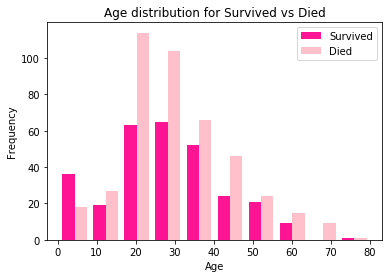

In [19]:
# Plot histograms
plt.hist([x, y], label = ['Survived', 'Died'], color = colors)
# Add title, legend, and axis names
plt.title("Age distribution for Survived vs Died")
plt.legend(loc = 'upper right')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

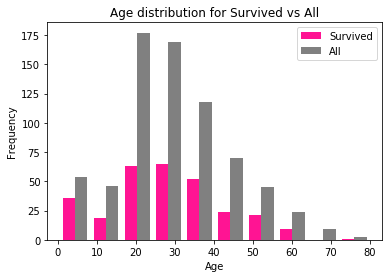

In [20]:
# Plot histograms
plt.hist([x, z], label = ['Survived', 'All'], color = ['#FF1493', 'grey'])
# Add title, legend, and axis names
plt.title("Age distribution for Survived vs All")
plt.legend(loc = 'upper right')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Observations:  
* Age has a normal distribution around 25 years, skewed to the right
* Survival depends greatly on age gap, as expected
* Children less than 10 years of age have a survival rate of ~80%
* The rest of the age gaps have more deaths than survivals, specially young adults (20-30 and 30-40) which where probably the last to board the rafts

### SibSp

In [21]:
# Unique values
raw_train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [22]:
# Missing values (%)
round(sum(raw_train["SibSp"].isnull())/len(raw_train)*100, 2)

0.0

In [23]:
# Extract SibSp according to Survived
x = raw_train.loc[raw_train["Survived"] == 1, "SibSp"]
y = raw_train.loc[raw_train["Survived"] == 0, "SibSp"]

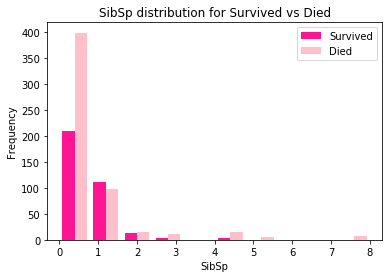

In [24]:
# Histogram
plt.hist([x,y], label = ["Survived", "Died"], color = colors)
# Add title, legends, and axis names
plt.legend(loc = "upper right")
plt.title("SibSp distribution for Survived vs Died")
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.show()

Obervations: 
* Most people were travelling alone, as they are neither siblings nor spouses of someone else (SibSp = 0)
* People travelling alone mostly died (they were probably young adult males)
* For people travelling with 1 sibiling/spouse, chances of survival were more than 50%
* For the rest of the categories, there are too few values to make clear conclusions

### Parch

In [25]:
# Unique values
raw_train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [26]:
# Missing values (%)
round(sum(raw_train["Parch"].isnull())/len(raw_train)*100, 2)

0.0

In [27]:
# Extract Parch according to Survived
x = raw_train.loc[raw_train["Survived"] == 1, "Parch"]
y = raw_train.loc[raw_train["Survived"] == 0, "Parch"]

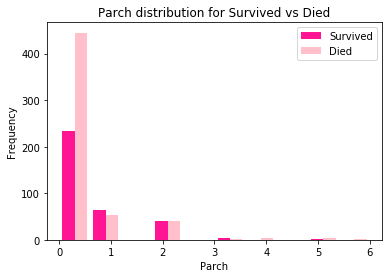

In [28]:
# Histogram
plt.hist([x,y], label = ["Survived", "Died"], color = colors)
# Add title, legends, and axis names
plt.legend(loc = "upper right")
plt.title("Parch distribution for Survived vs Died")
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.show()

Observations:
* Similar to SipSp, for people with no children / parents chances of survival were low
* For people with 1 or 2 SipSp, chances were ~50% or more

### Ticket

In [29]:
# Unique values
raw_train["Ticket"].unique()[1:100]

array(['PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877',
       '17463', '349909', '347742', '237736', 'PP 9549', '113783',
       'A/5. 2151', '347082', '350406', '248706', '382652', '244373',
       '345763', '2649', '239865', '248698', '330923', '113788', '347077',
       '2631', '19950', '330959', '349216', 'PC 17601', 'PC 17569',
       '335677', 'C.A. 24579', 'PC 17604', '113789', '2677', 'A./5. 2152',
       '345764', '2651', '7546', '11668', '349253', 'SC/Paris 2123',
       '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237',
       '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509', '19947',
       'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '113572',
       '36973', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464',
       '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C. 6

In [30]:
# Missing values (%)
round(sum(raw_train["Ticket"].isnull())/len(raw_train)*100, 2)

0.0

In [31]:
# Not all are unique values, there are some repeated.
print("Total:", len(raw_train))
print("Unique:", len(raw_train["Ticket"].unique()))

Total: 891
Unique: 681


In [32]:
# Summary shows that at most there are 7 tickets of the same kind
pd.DataFrame(raw_train.groupby("Ticket")["PassengerId"].count().sort_values(ascending = False)) .head()

,PassengerId
Ticket,
CA. 2343,7
1601,7
347082,7
347088,6
CA 2144,6


Observation: This variable will probably be discarded in an initial analysis.

### Fare

In [33]:
# Unique values: shows that there are several repeated values
len(raw_train["Fare"].unique())

248

In [34]:
# Missing values: Not present
round(sum(raw_train["Fare"].isnull())/len(raw_train)*100, 2)

0.0

In [35]:
# Extract Fare according to Survived
x = raw_train.loc[raw_train["Survived"] == 1, "Fare"]
y = raw_train.loc[raw_train["Survived"] == 0, "Fare"]

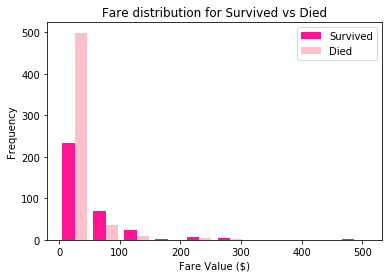

In [36]:
# Histogram
plt.hist([x,y], label = ["Survived", "Died"], color = colors)
# Add title, legends, and axis names
plt.legend(loc = "upper right")
plt.title("Fare distribution for Survived vs Died")
plt.xlabel("Fare Value ($)")
plt.ylabel("Frequency")
plt.show()

Observations:
* The histogram shows the existance of some outliers to the right (either very last minute purchases or incorrectly inputed values)
* Similarly to the Pclass analysis, survival for low fares is very low (~30%), while for more expensive fares it is greater than 50%

### Cabin

In [37]:
# Unique values: shows that there are several repeated values
len(raw_train["Cabin"].unique())

148

In [38]:
# Missing values: 77%
round(sum(raw_train["Cabin"].isna())/len(raw_train)*100, 2)

77.1

In [39]:
# Generate df for plotting NAs vs Not NAs by Pclass
df = raw_train.groupby(["Pclass"]).count()[["PassengerId", "Cabin"]]
df["Null cabin value"] = df["PassengerId"] - df["Cabin"]
df = df[["Null cabin value", "Cabin"]]
df

,Null cabin value,Cabin
Pclass,,
1,40,176
2,168,16
3,479,12


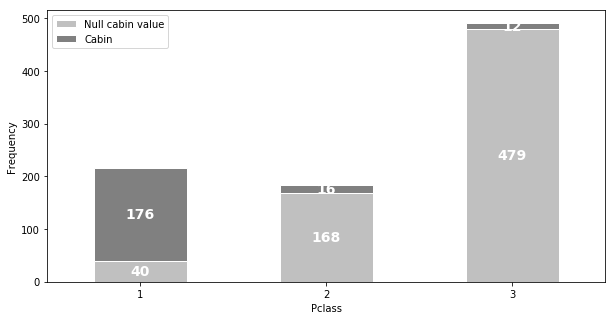

In [40]:
# Plot a stacked bar chart
ax = df.plot(stacked = True, kind = 'bar', figsize = (10, 5), color = ["silver", "grey"], edgecolor = 'white')

# Set no rotation in axis labels
plt.xticks(rotation=0)

# Set axis names and labels
plt.xlabel(var)
plt.xticks(np.arange(len(df)), df.index)
plt.ylabel("Frequency")

# Locate each rectangle in the plot's patches (objects)
for rect in ax.patches:
    
    # Find where each rectangle is located
    height = rect.get_height()
    width = rect.get_width()
    
    # Get coordinates
    x = rect.get_x()
    y = rect.get_y()
    
    # The frequency is represented by the height of each rectangle, and it's what we want to show
    label_text = height
    
    # Assign position of the label
    label_x = x + width/2
    label_y = y + height/2
    
    # Add text label
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 14, fontweight = "bold", color = "white")

# Show plot
plt.show()

Observations:
* Cabin number is 77% missing, but it might mean that some passengers did not have a cabin, and not that their cabin number is missing
* This is further supported by the fact that almost all 1st class passengers have a cabin number, while 2nd and 3rd class don't
* It would be better to replace NAs whith something rather than eliminating this variable

### Embarked

In [41]:
# Unique values
raw_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
# Missing values
round(sum(raw_train["Embarked"].isna())/len(raw_train)*100, 2)

0.22

In [43]:
# Create dataframe for plot
# Select variable for analysis
var = "Embarked"
# Generate dataframe grouping by the variable of interest
df = raw_train.groupby([var], as_index = False).sum()
# Create the variable "Died" by substracting survivals from total passengers
df["Died"] = raw_train.groupby([var], as_index = False).sum()["Train"] - raw_train.groupby([var], as_index = False).sum()["Survived"]
# Extract only variables of interest
df = df.loc[:,[var, "Survived", "Died"]]
# Visualize resulting df
df

,Embarked,Survived,Died
0,C,93,75
1,Q,30,47
2,S,217,427


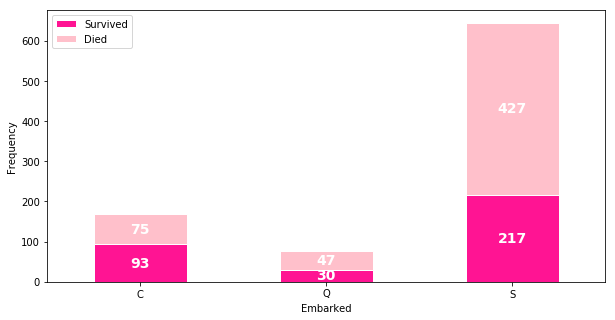

In [44]:
# Plot a stacked bar chart
ax = df[["Survived", "Died"]].plot(stacked = True, kind = 'bar', figsize = (10, 5), color = colors, edgecolor = 'white',)

# Set no rotation in axis labels
plt.xticks(rotation=0)

# Set axis names and labels
plt.xlabel(var)
plt.xticks(np.arange(len(df)), df[var])
plt.ylabel("Frequency")

# Locate each rectangle in the plot's patches (objects)
for rect in ax.patches:
    
    # Find where each rectangle is located
    height = rect.get_height()
    width = rect.get_width()
    
    # Get coordinates
    x = rect.get_x()
    y = rect.get_y()
    
    # The frequency is represented by the height of each rectangle, and it's what we want to show
    label_text = height
    
    # Assign position of the label
    label_x = x + width/2
    label_y = y + height/2
    
    # Add text label
    ax.text(label_x, label_y, label_text, ha = 'center', va = 'center', fontsize = 14, fontweight = "bold", color = "white")

# Show plot
plt.show()

Observations:
* Most people embarked at S
* For them, survival was ~30%
* For the other two ports, survival was around ~50%
* It might hide some useful information about the people (students, workers, etc)
* NAs representing 22% should therefore be replaced, rather than eliminating the whole column

## Missing value imputation

In [45]:
# Group variables according to their use
predictors = ["Age", "Cabin", "Embarked", "Fare", "Parch", "Pclass", "Sex", "SibSp"]
target = ["Survived"]
drop_var = ['PassengerId', 'Name', 'Ticket']

In [46]:
# Visualize missing values per column
for col in raw_combined[predictors]:
    print(col, sum(raw_combined[col].isna()))

Age 263
Cabin 1014
Embarked 2
Fare 1
Parch 0
Pclass 0
Sex 0
SibSp 0


### Age

In [47]:
# Median age in Train set
raw_combined.loc[(raw_combined["Train"] == 1), "Age"].median()

28.0

In [48]:
# Replace missing values by median in TRAIN set
raw_combined.loc[raw_combined["Age"].isna(), "Age"] = raw_combined.loc[(raw_combined["Train"] == 1), "Age"].median()

### Cabin

In [49]:
# Replace missing values by the word "NO"
raw_combined.loc[raw_combined["Cabin"].isna(), "Cabin"] = "NO"

### Embarked

In [50]:
# Replace missing values by the word "NO"
raw_combined.loc[raw_combined["Embarked"].isna(), "Embarked"] = "NO"

### Fare

In [51]:
# Find mean fare
raw_combined["Fare"].mean()

33.2954792813456

In [52]:
# Replace missing values by the mean fare
raw_combined.loc[raw_combined["Fare"].isna(), "Fare"] = raw_combined["Fare"].mean()

## Summary of correlations and distributions

In [53]:
# Select variables to plot (include target and all predictors except Cabin, that takes on too many values)
plot_vars = ["Survived", "Age", "Embarked", "Fare", "Parch", "Pclass", "Sex", "SibSp"]

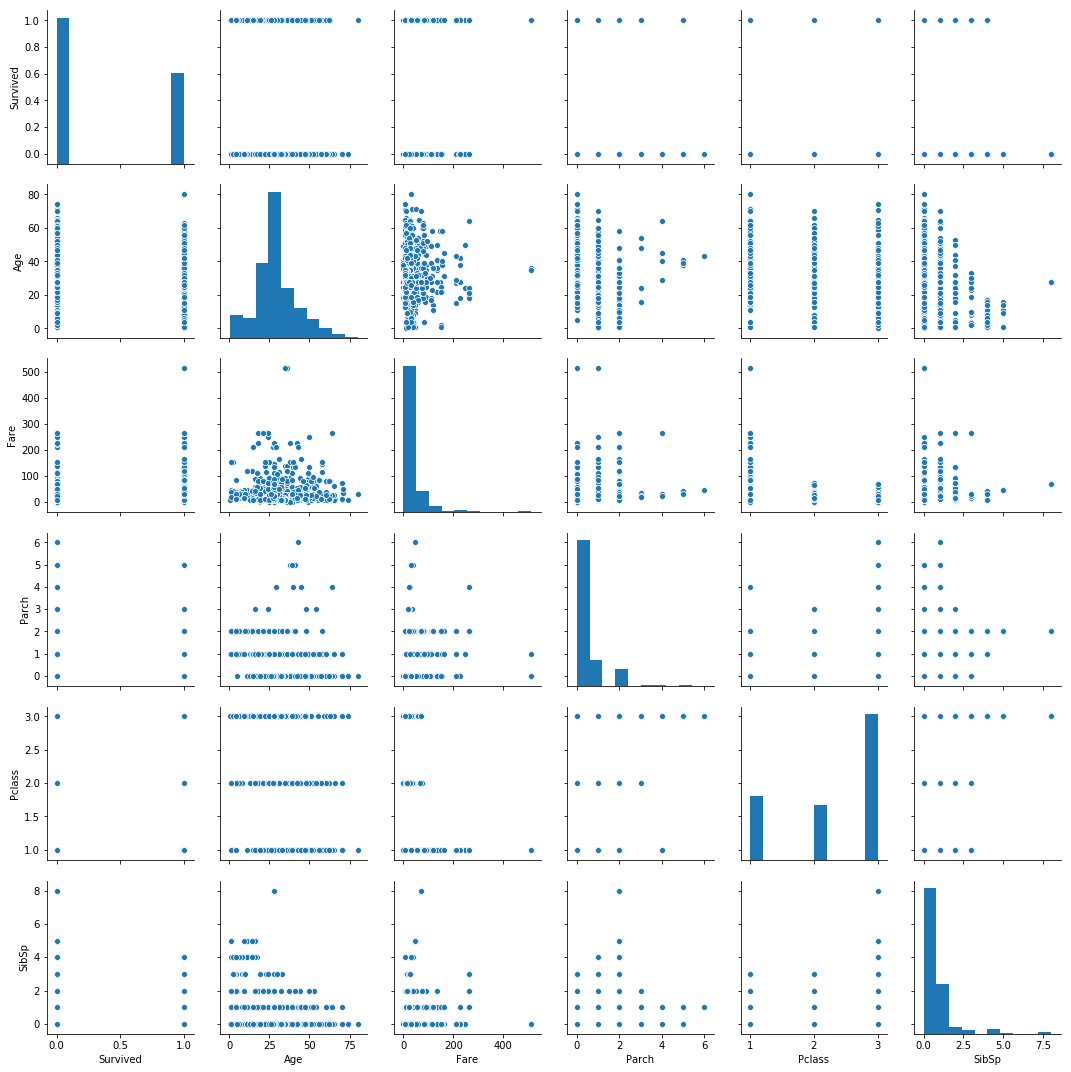

In [54]:
## Correlogram in Train Set
sns.pairplot(raw_combined.loc[raw_combined["Train"] == 1, plot_vars])
plt.show()

Obervations:
* Fare vs Age plot (bell shaped) shows that most expensive trips were paid by adults of about 40 years
* Fare vs Pclass shows the obvious fact that 1st class costed more than 2nd and 3rd
* Fare vs Parch and vs SibSp shows that more expensive fares were paid by people travelling alone or with few companions (big families paid low fares)
* SibSp vs Age shows that the more SibSp, the younger the person tends to be (probably indicating big families with children) 

## Save trasformed dataset

In [55]:
# Save transformed dataset for modelling phases
raw_combined.to_csv("../Data/raw_combined.csv")